In [1]:
import numpy as np
# this block loads a dataset from tensorflow repository
# and also it include tensorflow lib
import tensorflow_datasets as tfds
import tensorflow as tf

In [2]:
# now it loads data for training and data for testing, also it loads info about
# this dataset
train_data, info = tfds.load("fashion_mnist", with_info=True, split="train")
test_data = tfds.load("fashion_mnist", split="test")

In [3]:
# give names of each in the dataset
names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [4]:
# import different stuff for plotting
from matplotlib import rcParams
from matplotlib import pyplot as plt

rcParams["figure.figsize"] = [10, 10]
rcParams['xtick.labelbottom'] = False

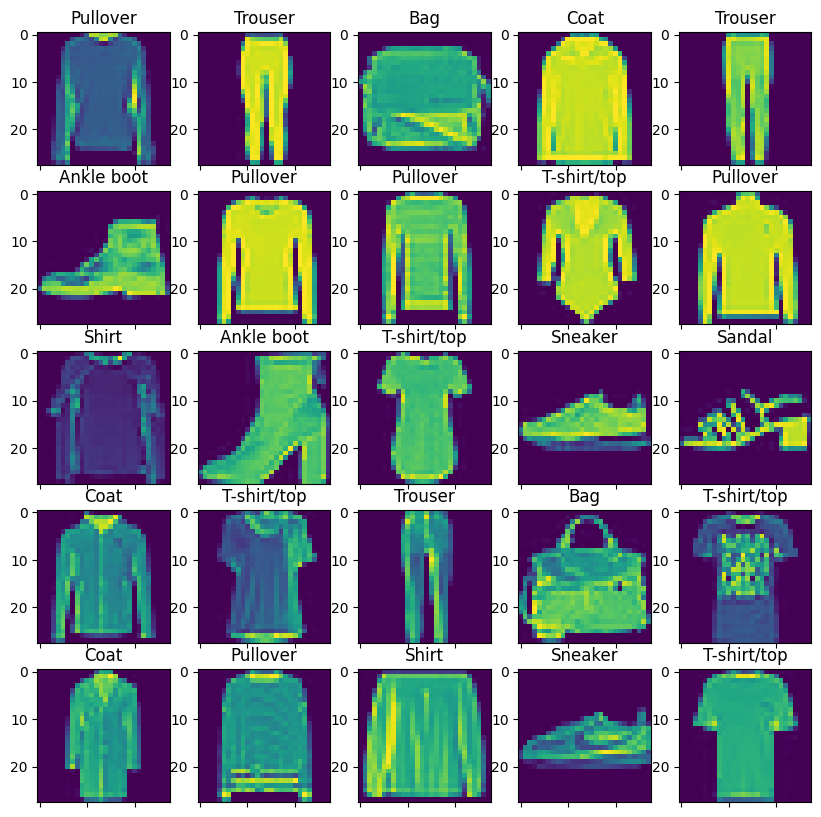

In [5]:
# finaly plot it on the
for idx, elem in enumerate(train_data.take(25)):
    plt.subplot(5, 5, idx + 1, title=names[elem['label'].numpy()])
    plt.imshow(elem['image'][:, :, 0])

In [6]:
# this function does the simplest pre-processing, it just unzip loaded data
# in more comfortable way
def preprocessing(data):
    x = tf.cast(data["image"], tf.float32)
    x = tf.image.resize(x, (28, 28))
    y = tf.one_hot(data["label"], depth=10)
    return x, y


def preprocessing_with_norm(data):
    x = tf.cast(data["image"], tf.float32) / 255.0
    x = tf.image.resize(x, (28, 28))
    y = tf.one_hot(data["label"], depth=10)
    return x, y

In [7]:
import tensorflow_addons as tfa
from random import seed
from random import randint
from random import random

seed(1)

In [8]:
def do_augmentation(image):
    rand_augment_code = randint(0, 28)
    angle = 0.2 * random()
    shear = 0.15 * random()
    if rand_augment_code < 4:
        x = tf.image.random_flip_left_right(image)
    elif rand_augment_code < 8:
        x = tfa.image.rotate(image, angle, fill_mode="constant", fill_value=0)
    elif rand_augment_code < 12:
        x = tfa.image.rotate(image, -angle, fill_mode="constant", fill_value=0)
    elif rand_augment_code < 16:
        x = tfa.image.shear_x(image, shear)
    elif rand_augment_code < 20:
        x = tfa.image.shear_y(image, -shear)
    elif rand_augment_code < 24:
        x = tfa.image.shear_y(image, shear)
    else:
        x = tfa.image.shear_y(image, -shear)
    return x


def preprocessing_with_augmentaion(data):
    x = do_augmentation(data["image"])
    x = tf.cast(x, tf.float32)
    x = tf.image.resize(x, (28, 28))
    y = tf.one_hot(data["label"], depth=10)
    return x, y


def preprocessing_with_aug_norm(data):
    x = do_augmentation(data["image"])
    x = tf.cast(x, tf.float32) / 255.0
    x = tf.image.resize(x, (28, 28))
    y = tf.one_hot(data["label"], depth=10)
    return x, y

In [9]:
# pre-process the train and the test data

train_data_pre_1 = train_data.map(preprocessing_with_aug_norm)
train_data_pre_2 = train_data.map(preprocessing_with_norm)
train_data_pre = train_data_pre_1.concatenate(train_data_pre_2)

test_data_pre = test_data.map(preprocessing_with_norm)

batch_size = 64
train_data_pre = train_data_pre.batch(batch_size)
test_data_pre = test_data_pre.batch(batch_size)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

def base_model():
    model = Sequential()
    model.add(Conv2D(filters=8, kernel_size=(2, 2), strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=24, kernel_size=(2, 2), strides=(1, 1), padding='same', activation='relu'))
    model.add(Flatten())
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=10, activation='softmax'))

    return model

In [11]:
model = base_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         40        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 24)          1560      
                                                                 
 flatten (Flatten)           (None, 1176)              0

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=["accuracy"])

In [14]:
history = model.fit(train_data_pre, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 23s 10ms/step - loss: 0.4413 - accuracy: 0.8398
Epoch 2/15
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2978 - accuracy: 0.8911
Epoch 3/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2591 - accuracy: 0.9058
Epoch 4/15
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2347 - accuracy: 0.9143
Epoch 5/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2171 - accuracy: 0.9206
Epoch 6/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2035 - accuracy: 0.9261
Epoch 7/15
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1928 - accuracy: 0.9297
Epoch 8/15
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1838 - accuracy: 0.9339
Epoch 9/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1763 - accuracy: 0.9367
Epoch 10/15
1875/1875 [==============================] - 19s 10ms/s

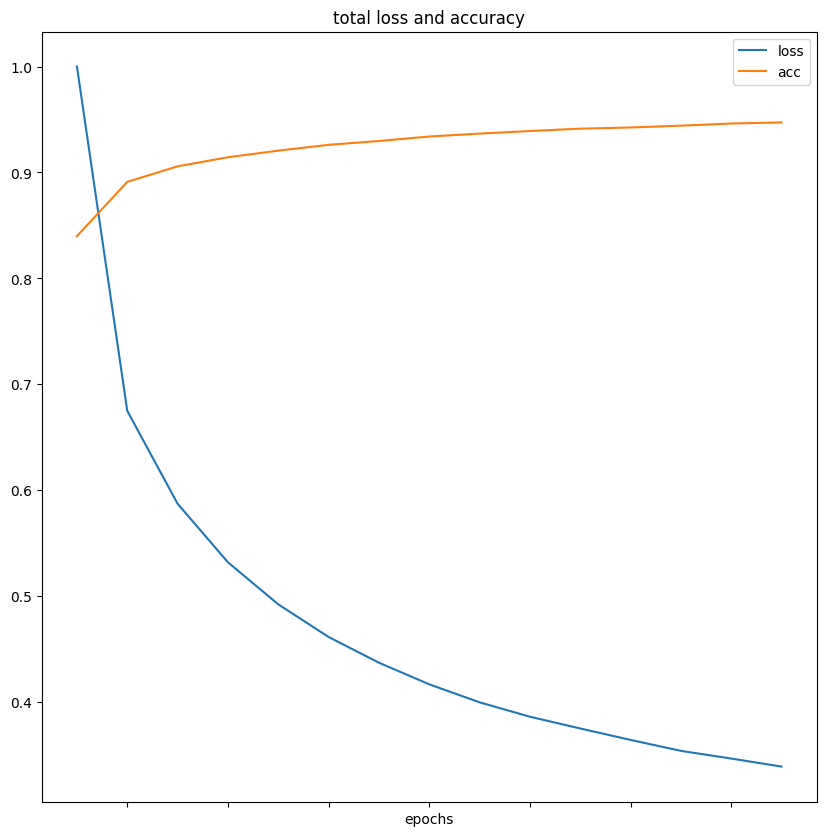

In [20]:
import matplotlib.pyplot as plt
import numpy as np

epoch_array = range(1, len(history.history['loss']) + 1)
loss_array = history.history['loss']
acc_array = history.history['accuracy']

max_loss = max(loss_array)
loss_array = np.array(loss_array) / max_loss

plt.plot(epoch_array, loss_array, label="loss")
plt.plot(epoch_array, acc_array, label="acc")
plt.xlabel("epochs")
plt.title("total loss and accuracy")

plt.legend()
plt.show()

In [22]:
results = model.evaluate(test_data_pre)
print(results)

157/157 [==============================] - 1s 7ms/step - loss: 0.3331 - accuracy: 0.9077
[0.33313754200935364, 0.9077000021934509]


In [ ]:
from matplotlib import rcParams
from matplotlib import pyplot as plt

rcParams["figure.figsize"] = [10, 10]
rcParams['xtick.labelbottom'] = False

313/313 [==============================] - 1s 3ms/step


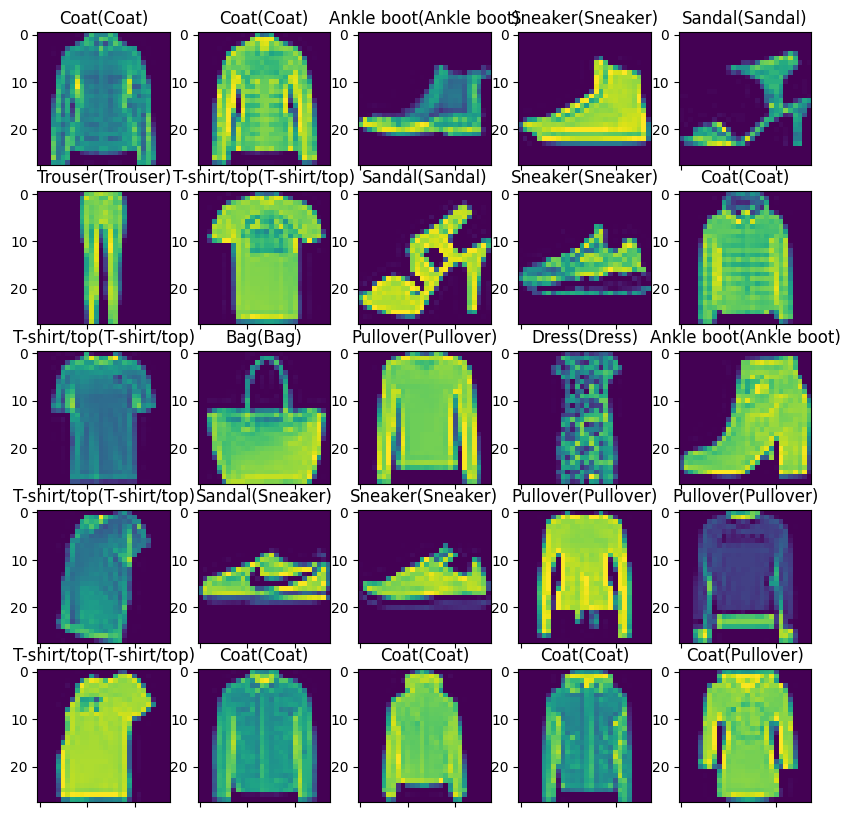

In [24]:
# finally visualize it
x_test = np.concatenate([x for x, y in test_data_pre], axis=0)
y_test = np.concatenate([y for x, y in test_data_pre], axis=0)

test_pred = model.predict(x_test)

for idx, elem in enumerate(test_data.take(25)):
    pred_idx = np.argmax(test_pred[idx])
    true_idx = np.argmax(y_test[idx])
    plt.subplot(5, 5, idx + 1, title=(names[pred_idx] + "(" + names[true_idx] + ")"))
    plt.imshow(elem['image'][:, :, 0])

313/313 [==============================] - 1s 3ms/step


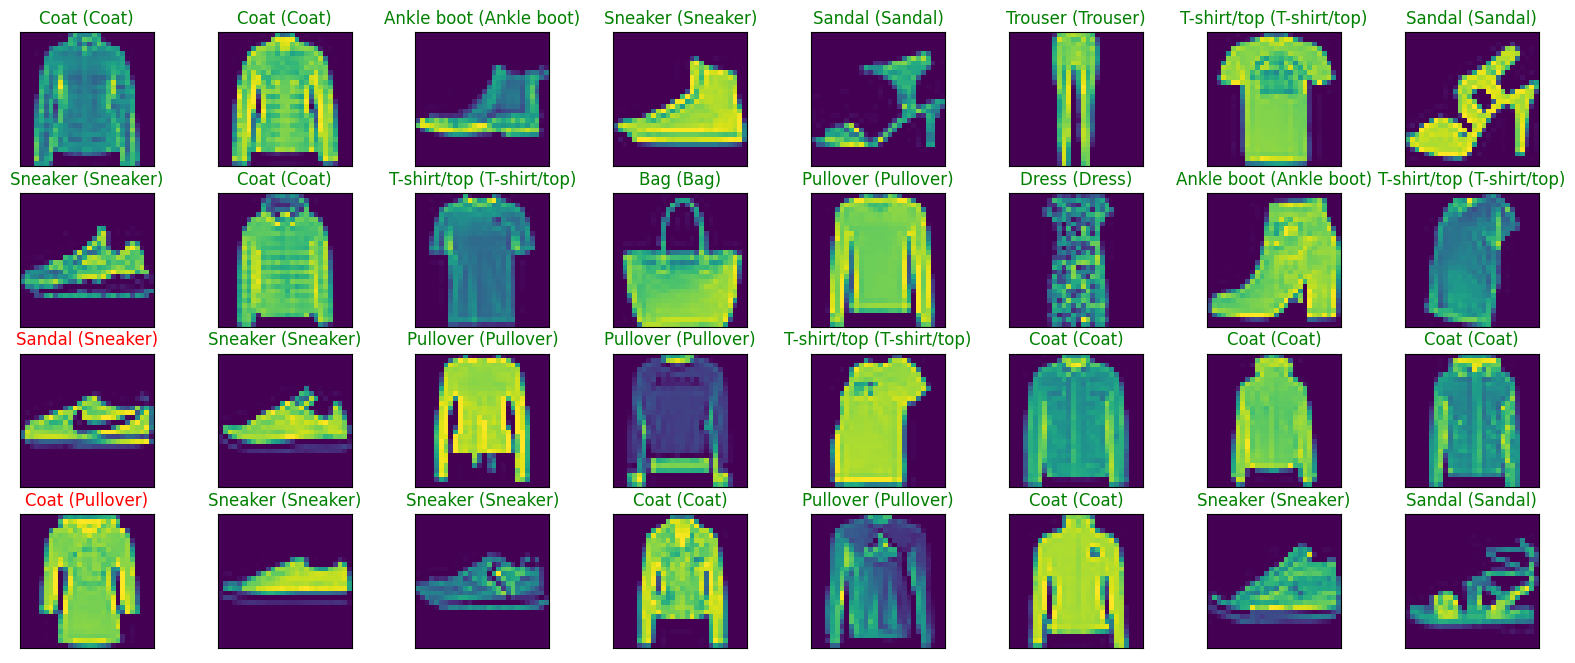

In [26]:
from matplotlib import pyplot

test_pred = model.predict(x_test)
fig = pyplot.figure(figsize=(20, 8))

for idx, elem in enumerate(test_data.take(32)):
    ax = fig.add_subplot(4, 8, idx + 1, xticks=[], yticks=[])
    ax.imshow(elem['image'][:, :, 0])
    pred_idx = np.argmax(test_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(names[pred_idx], names[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
pyplot.show()